# Orbital Mechanics Homework

By Aditya Sudhakar

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [5]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [6]:
r_0 = 147e9 * m
v_0 = 30330 * m / s

init = State(x = r_0 ,
             y = 0 * m, 
             vx = 0 * m / s,
             vy = v_0)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,30330.0 meter / second


In [7]:
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e10 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000000.0 second


In [8]:
def universal_gravitation(state, system):

    x, y, vx, vy = state
    unpack(system)
    
    f_mag = G * m1 * m2 / (x**2 + y**2)
    direction = Vector (-x, -y)
    grav = direction.hat() * f_mag
    
    return grav

In [9]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22  0.0000000e+00], 'newton')>

In [10]:
def slope_func(state, t, system):

    x, y, vx, vy= state
    unpack(system)    

    grav = universal_gravitation(state, system)
    
    dxdt = vx
    dydt = vy
    dvxdt = grav.x / m2
    dvydt = grav.y / m2
    
    
    return dxdt, dydt, dvxdt, dvydt

In [11]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(0.0, 'newton / kilogram')>)

In [12]:
def event_func(state, t, system):
    x, y, vx, vy = state
    r = Vector(x,y)
    
    return r.mag - system.r_final

In [13]:
event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [14]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[364980158.866949]]
nfev,4448
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [15]:
t_final = get_last_label(results) * s

<Quantity(364980158.866949, 'second')>

In [16]:
t_final.to(UNITS.day)

<Quantity(4224.307394293391, 'day')>

In [17]:
ts = linspace(t_0, t_final, 600)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [18]:
results.index /= 60 * 60 * 24

In [19]:
x = results.x / 1e9;
y = results.y / 1e9;

In [20]:
one_year = 60*60*24*365

ts = linspace(0, one_year, 500)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

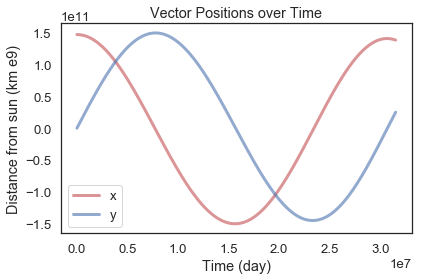

In [21]:
plot(results.x,'r', label='x')
plot(results.y,'b', label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (km e9)',
         title='Vector Positions over Time')

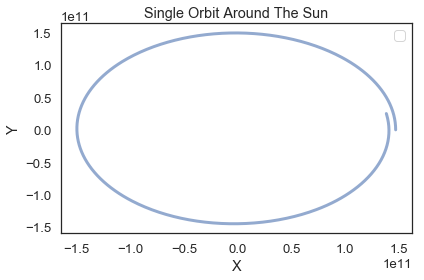

In [22]:
plot(results.x, results.y)

decorate(xlabel='X',
         ylabel='Y',
         title='Single Orbit Around The Sun')